In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import os
#import glob
from pandas import DataFrame
from pandas.io.parsers import TextFileReader
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
np.set_printoptions(suppress=True) 

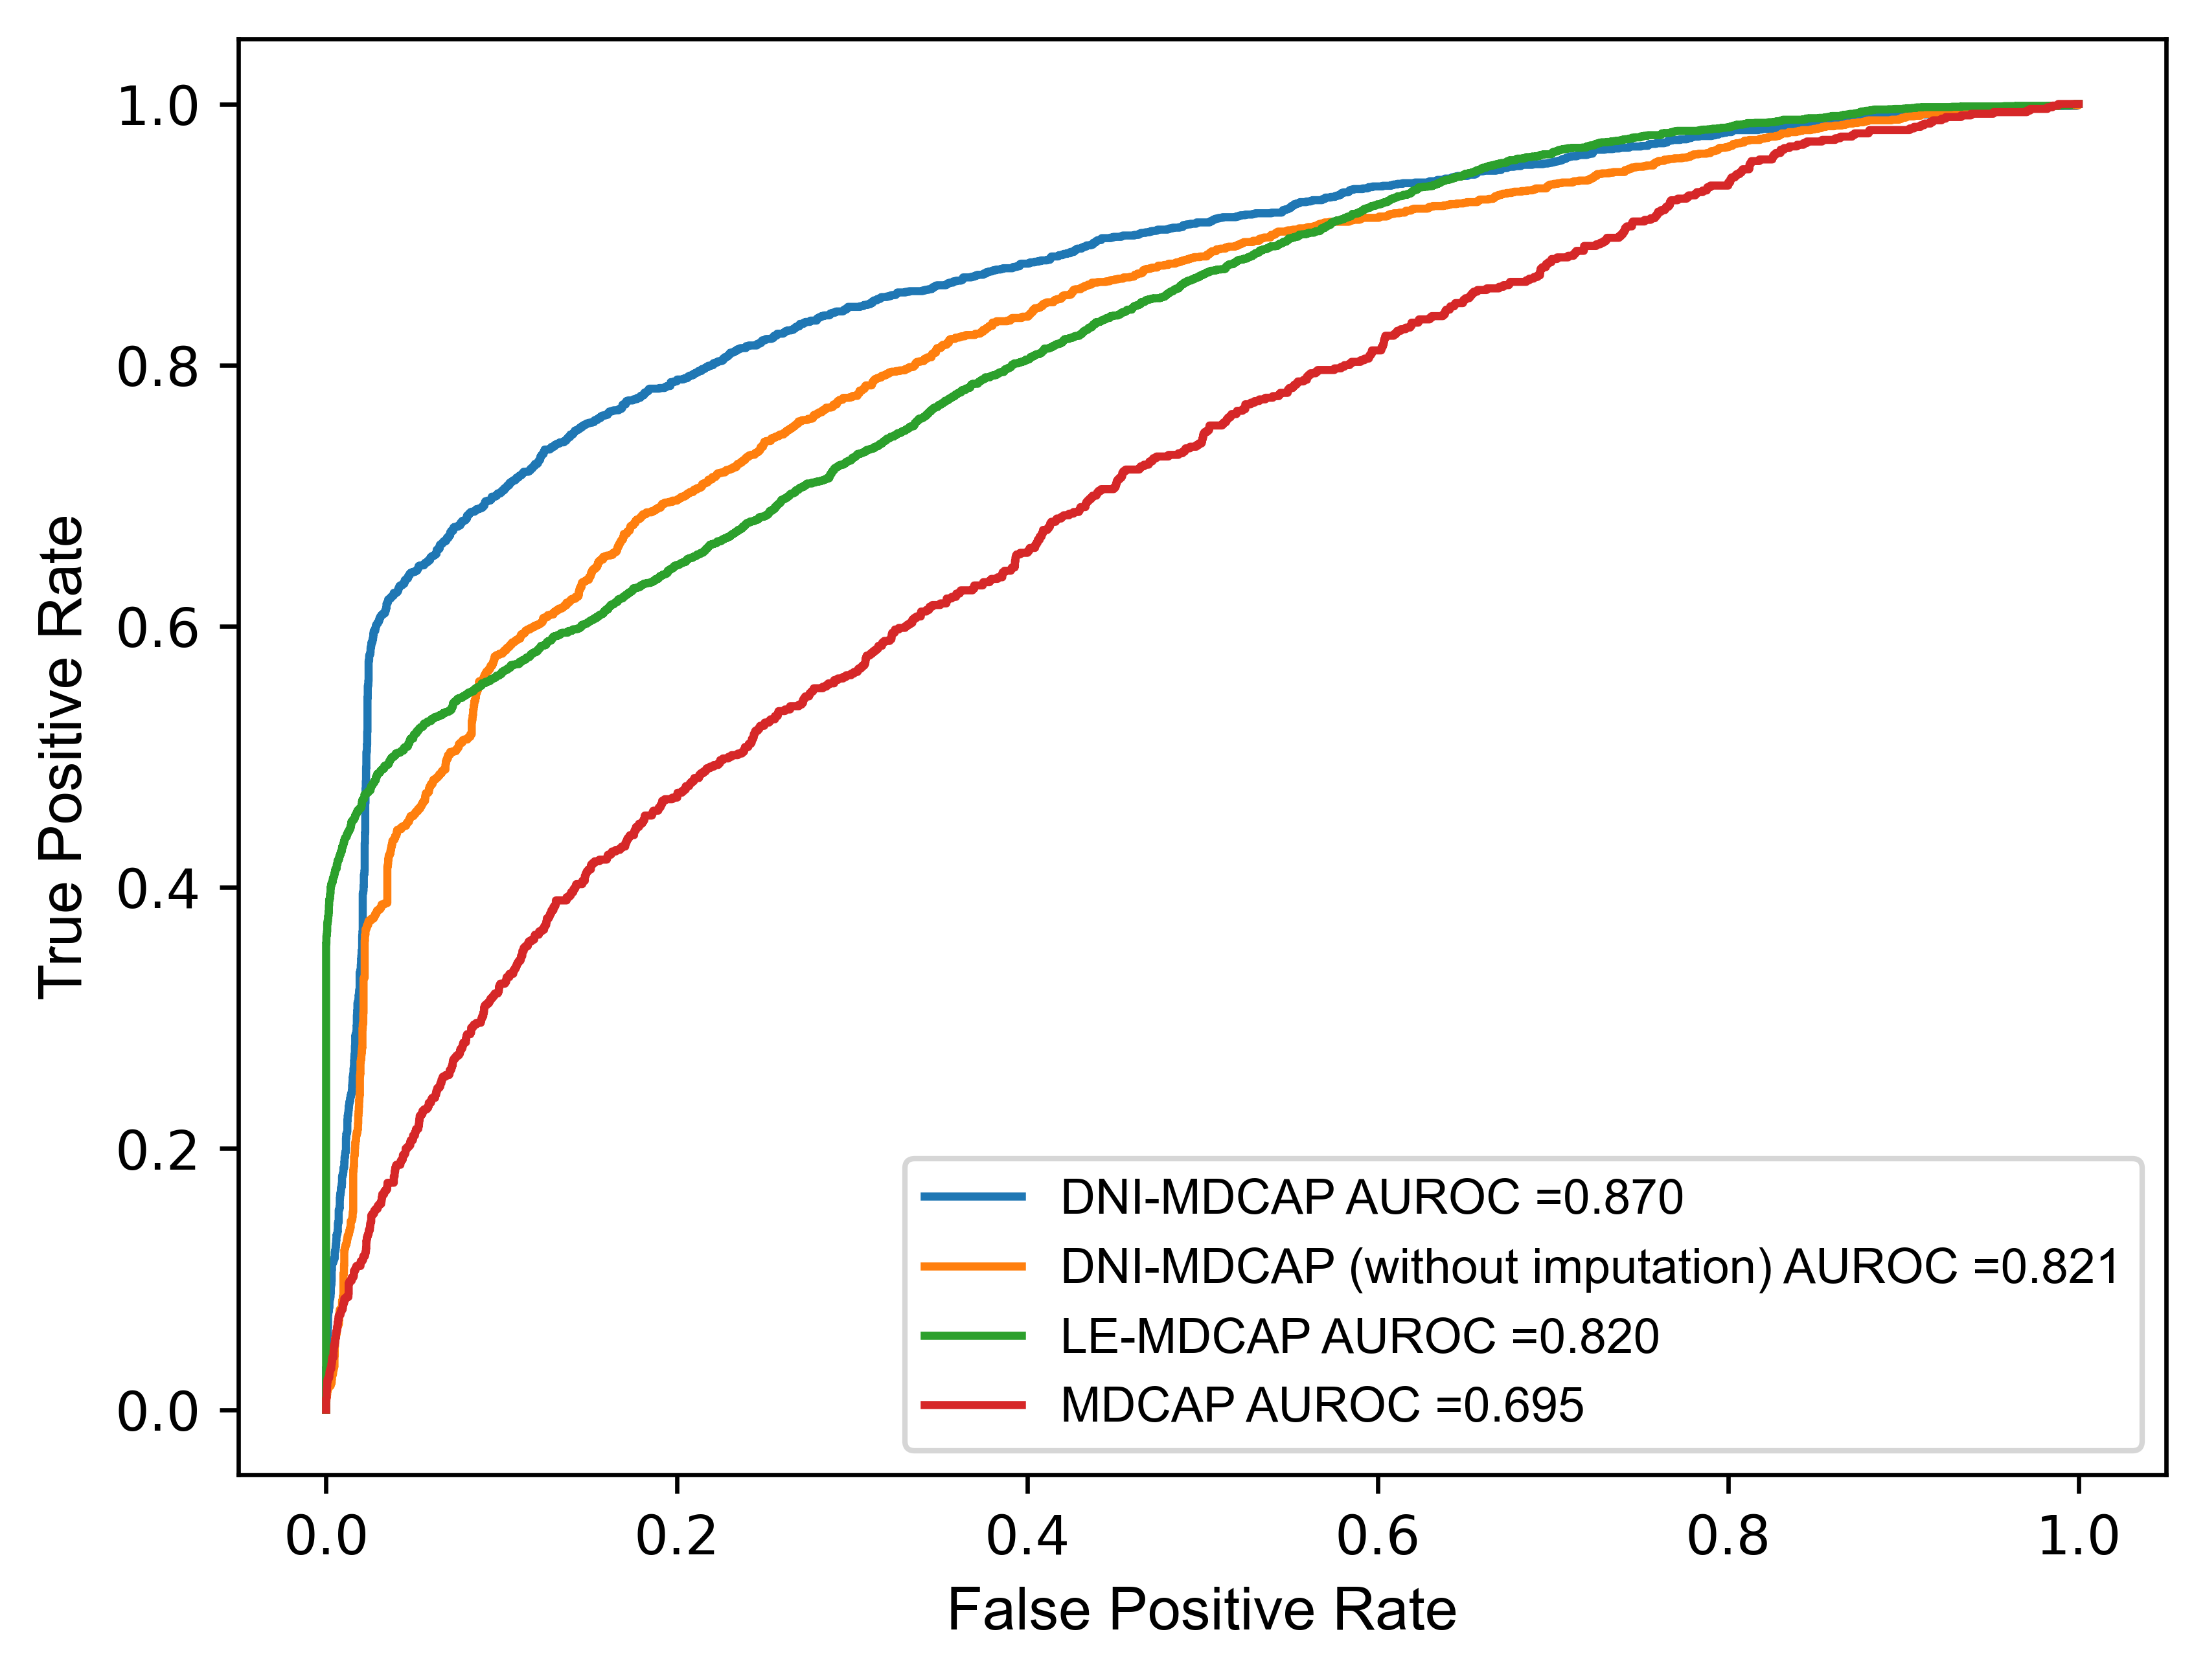

0.6948452222047738


In [7]:
plt.rcParams['figure.dpi'] = 600
plt.figure(1)
font1 = {"family":"Arial",
         "weight":"book",
         "size": 9
         }
#plt.title('ROC Curve',font1)
plt.xlabel('False Positive Rate',font1,fontsize=11)
plt.ylabel('True Positive Rate',font1,fontsize=11)
# Names = ["L1-norm","TLHNMDA","CNMDA","RWBRMDA","HGIMDA","HLPMDA","HNMDA","MDHGI","IMCMDA","RFMDA"]
'''for path in PathList:
    FileName = os.path.basename(path).split("_")[0]'''
data = pd.read_csv("result/Result_causal_for_ROC.txt", header=None, delimiter="\t", names=["mir","dis","y_scores","causality"])
#data = data.drop_duplicates(subset=["disease", "miRNA", "y_scores"], keep="first")
data = data.loc[data["causality"] != 3]
y_true = np.array(data.iloc[:,3])
y_true = np.where(y_true == 1,True,False)
y_scores = np.array(data.iloc[:,2])
area = 0
fpr,tpr,threshold = roc_curve(y_true,y_scores)
area = metrics.auc(fpr,tpr)
auc = round(area, 3)
#file = open("ROC.txt","a")
#file.write("causal"+"\t"+str(area)+"\n")
plt.figure(1)
plt.plot(fpr, tpr, label="DNI-MDCAP AUROC =0.870")

data = pd.read_csv("./result/Result_causal_for_ROC_no_imputation.txt", header=None, delimiter="\t", names=["mir","dis","y_scores","causality"])
#data = data.drop_duplicates(subset=["disease", "miRNA", "y_scores"], keep="first")
data = data.loc[data["causality"] != 3]
y_true = np.array(data.iloc[:,3])
y_true = np.where(y_true == 1,True,False)
y_scores = np.array(data.iloc[:,2])
area = 0
fpr,tpr,threshold = roc_curve(y_true,y_scores)
area = metrics.auc(fpr,tpr)
auc = round(area, 3)
#file = open("ROC.txt","a")
#file.write("causal"+"\t"+str(area)+"\n")
plt.figure(1)
plt.plot(fpr, tpr, label="DNI-MDCAP (without imputation) AUROC ="+str(auc))

data = pd.read_csv("result/Result_causal_for_ROC_LEMDCAP.txt", header=None, delimiter="\t", names=["mir","dis","y_scores","causality"])
#data = data.drop_duplicates(subset=["disease", "miRNA", "y_scores"], keep="first")
data = data.loc[data["causality"] != 3]
y_true = np.array(data.iloc[:,3])
y_true = np.where(y_true == 1,True,False)
y_scores = np.array(data.iloc[:,2])
area = 0
fpr,tpr,threshold = roc_curve(y_true,y_scores)
area = metrics.auc(fpr,tpr)
auc = round(area, 3)
plt.figure(1)
plt.plot(fpr, tpr, label="LE-MDCAP AUROC =" + str('%.3f' %auc))

data = pd.read_csv("result/result_of_causal_MDCAP.txt", header=None, delimiter="\t", names=["mir","dis","y_scores","causality"])
#data = data.drop_duplicates(subset=["disease", "miRNA", "y_scores"], keep="first")
data = data.loc[data["causality"] != 3]
y_true = np.array(data.iloc[:,3])
y_true = np.where(y_true == 1,True,False)
y_scores = np.array(data.iloc[:,2])
area = 0
fpr,tpr,threshold = roc_curve(y_true,y_scores)
area = metrics.auc(fpr,tpr)
auc = round(area, 3)
#file = open("ROC.txt","a")
#file.write("causal"+"\t"+str(area)+"\n")
plt.figure(1)
plt.plot(fpr, tpr, label="MDCAP AUROC =" + str(auc))

plt.legend(prop=font1)
plt.savefig("ROC_causal.tiff",dpi = 600)
plt.show()
plt.close()
#file.close()
print(str(area))

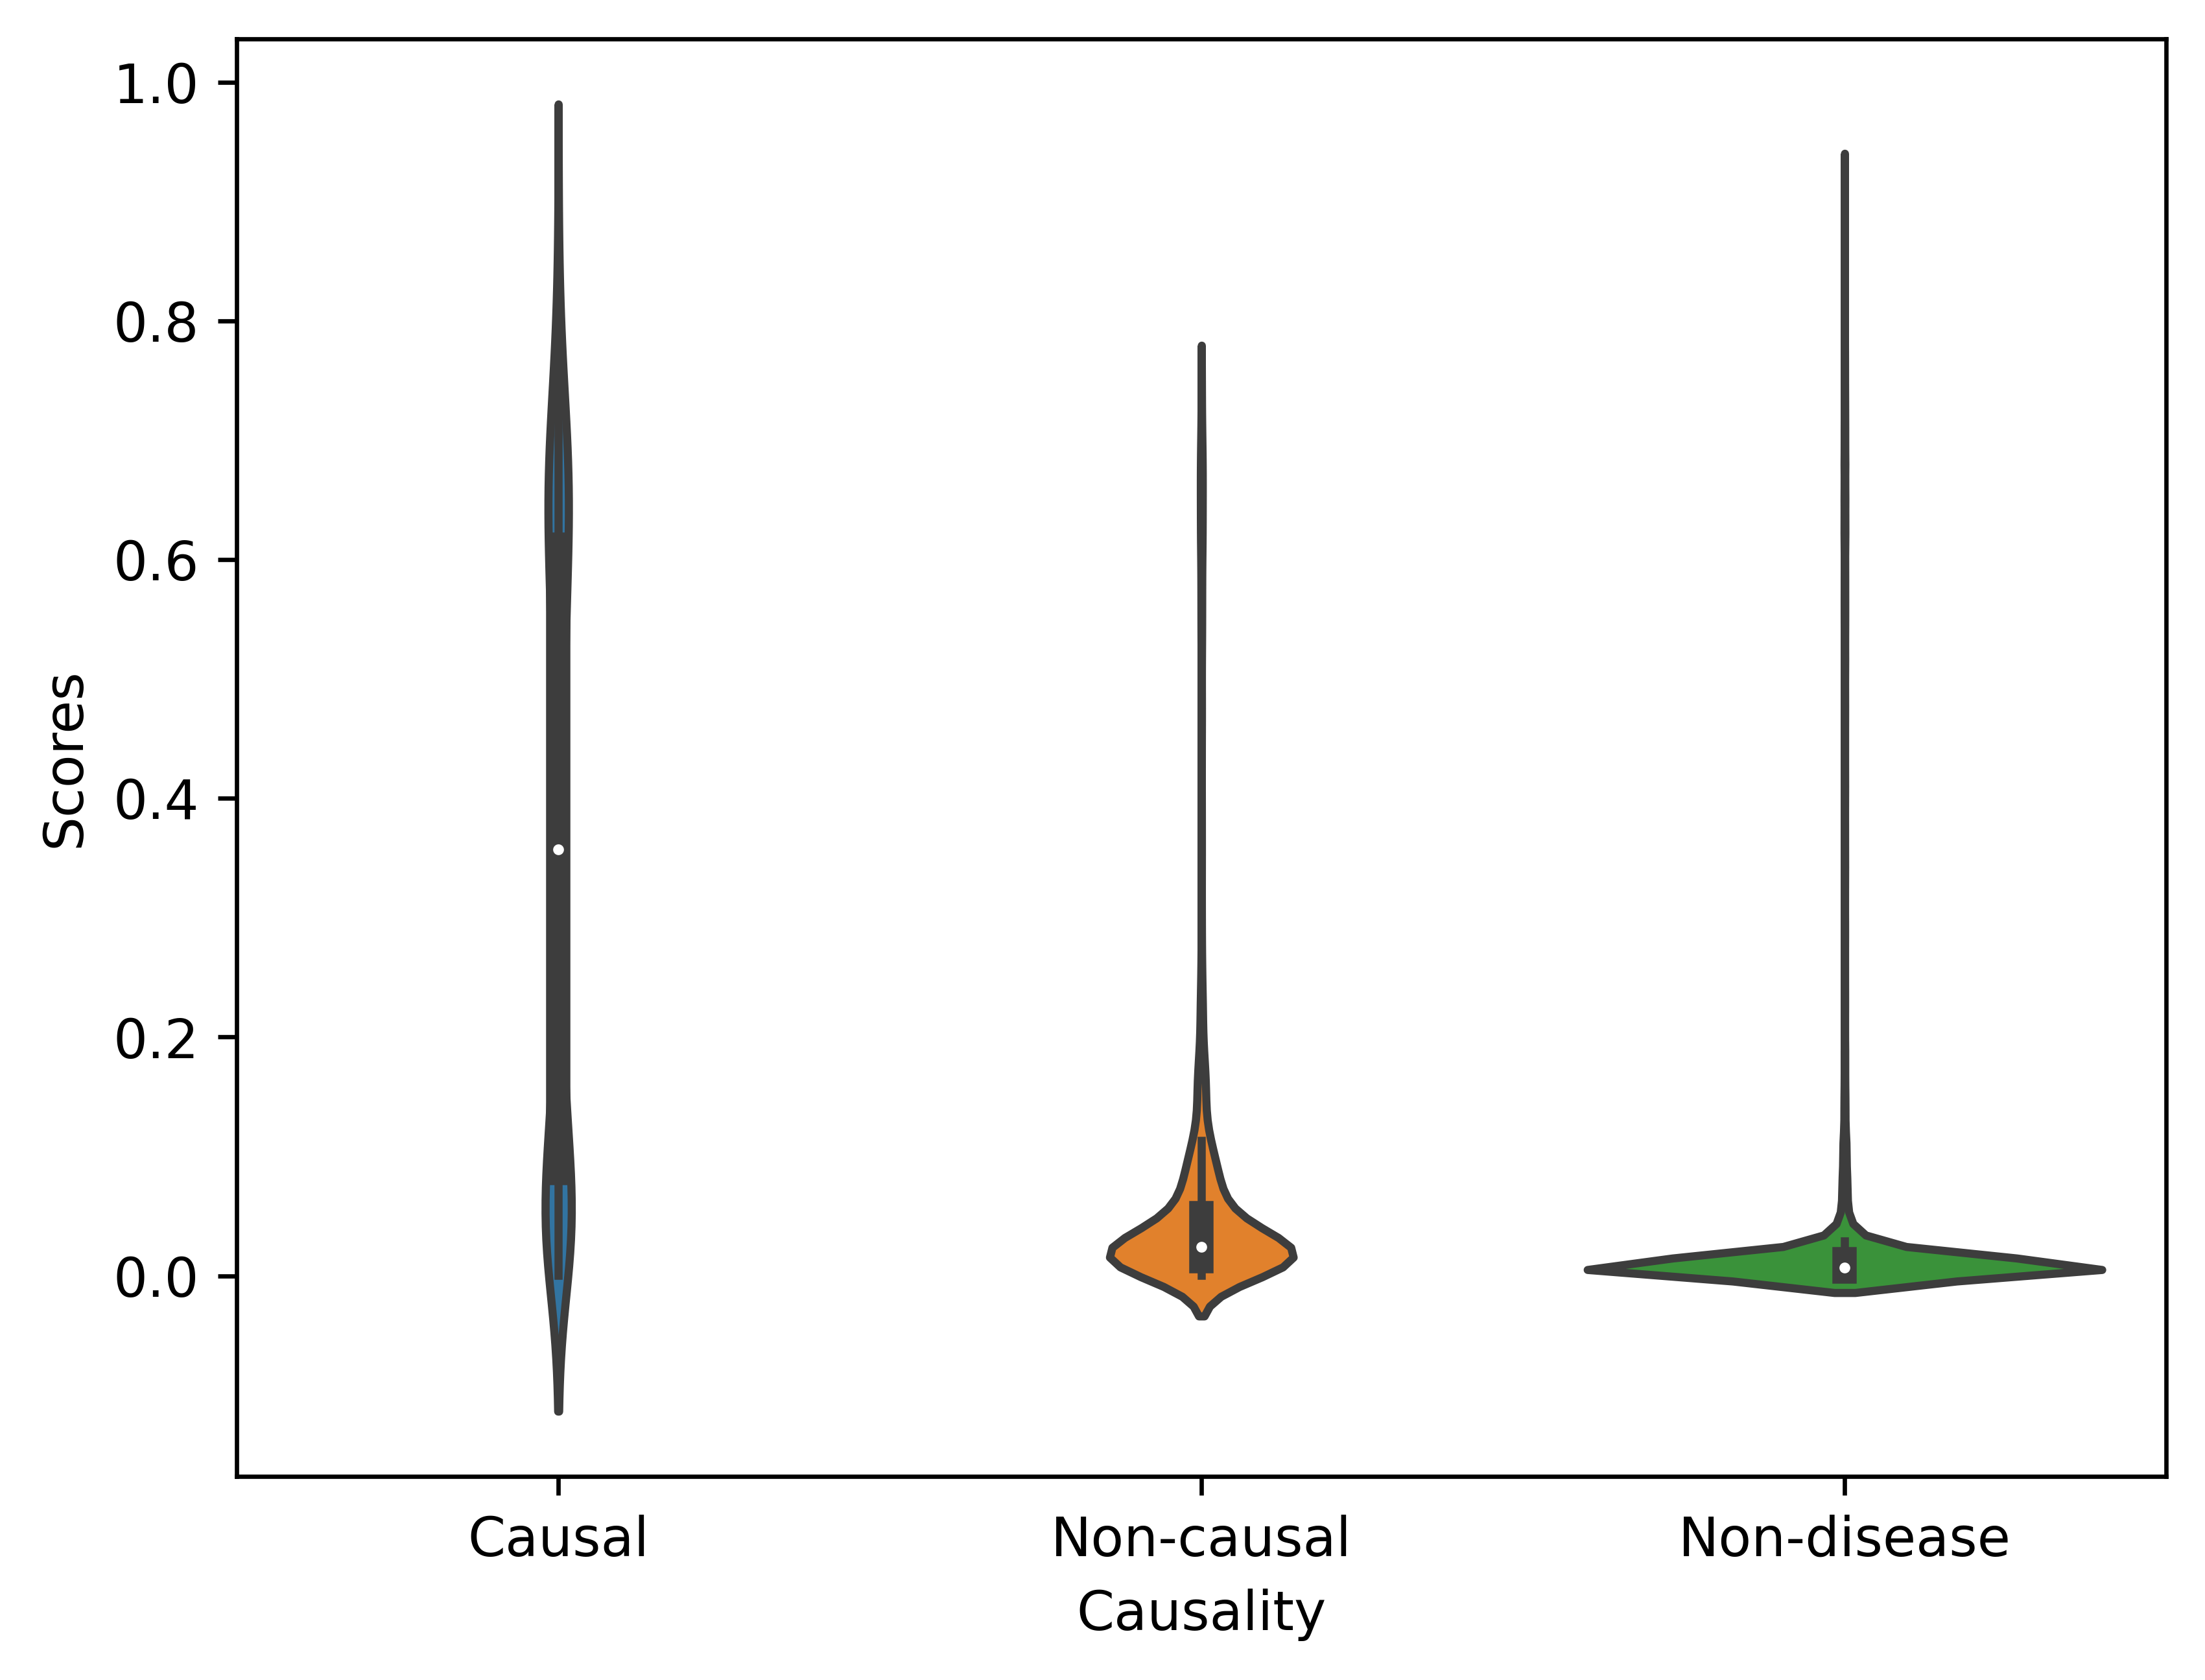

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn

data = pd.read_csv("./result/Result_causal_for_ROC.txt",header=None,names=["disease", "miRNA", "Scores", "Causality"], delimiter="\t")
data = data.loc[:, ["Scores", "Causality"]]
plt.rcParams['figure.dpi'] = 600
seaborn.violinplot(x="Causality", y="Scores", data=data)
plt.xticks([0, 1, 2], ["Causal", "Non-causal", "Non-disease"])
#plt.title("Causality")
#plt.savefig("violin.tiff",dpi=600)
plt.show()


In [2]:
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

In [141]:
data = pd.read_csv('./result/Result_causal.txt',header=0, sep="\t")
data

,mir,dis,score,causal
0,Acute Kidney Injury,hsa-let-7a,0.024083,3.0
1,Acute Lung Injury,hsa-let-7a,0.003870,3.0
2,Adenoviridae Infections,hsa-let-7a,0.005151,3.0
3,Adrenal Cortex Neoplasms,hsa-let-7a,0.013554,3.0
4,Adrenocortical Carcinoma,hsa-let-7a,0.014486,3.0
...,...,...,...,...
161565,Vascular System Injuries,hsa-mir-99b,0.003197,3.0
161566,Waldenstrom Macroglobulinemia,hsa-mir-99b,0.007893,3.0
161567,Wilms Tumor,hsa-mir-99b,0.008130,3.0
161568,Wound Healing,hsa-mir-99b,0.002678,3.0


In [142]:
causal1 = data[data['causal']==1]
causal1

,mir,dis,score,causal
33,Breast Neoplasms,hsa-let-7a,0.148922,1.0
40,"Carcinoma, Hepatocellular",hsa-let-7a,0.166483,1.0
82,"Diabetes Mellitus, Type 2",hsa-let-7a,0.434023,1.0
201,Melanoma,hsa-let-7a,0.057738,1.0
223,Neoplasms,hsa-let-7a,0.367235,1.0
...,...,...,...,...
161018,Cardiovascular Diseases,hsa-mir-99a,0.016426,1.0
161065,Esophageal Neoplasms,hsa-mir-99a,0.319487,1.0
161261,Urinary Bladder Neoplasms,hsa-mir-99a,0.080340,1.0
161262,Uterine Cervical Neoplasms,hsa-mir-99a,0.606276,1.0


In [143]:
causal=causal1['score'].values

In [144]:
knowncausal = pd.read_csv('./data/hmdd2_causal.txt',header = None,names=['mir','dis','cau'],sep='\t')
knowncausal

,mir,dis,cau
0,hsa-let-7a,"Lupus Erythematosus, Systemic",1
1,hsa-let-7a,Neoplasms,1
2,hsa-let-7a,"Diabetes Mellitus, Type 2",1
3,hsa-let-7a,"Sarcoma, Ewing",1
4,hsa-let-7a,Retinal Degeneration,1
...,...,...,...
4223,hsa-mir-98,Endomyocardial Fibrosis,1
4224,hsa-mir-98,"Carcinoma, Pancreatic Ductal",1
4225,hsa-mir-99a,Urinary Bladder Neoplasms,1
4226,hsa-mir-99a,Cardiovascular Diseases,1


In [145]:
noncausal1 = data[data['causal']==2]

In [147]:
noncausal1

,mir,dis,score,causal
6,Amyotrophic Lateral Sclerosis,hsa-let-7a,0.006870,2.0
19,Asthma,hsa-let-7a,0.007254,2.0
32,Brain Neoplasms,hsa-let-7a,0.009073,2.0
42,"Carcinoma, Non-Small-Cell Lung",hsa-let-7a,0.085434,2.0
47,"Carcinoma, Squamous Cell",hsa-let-7a,0.015468,2.0
...,...,...,...,...
161476,Multiple Myeloma,hsa-mir-99b,0.017707,2.0
161478,Muscular Atrophy,hsa-mir-99b,0.003001,2.0
161498,Obesity,hsa-mir-99b,0.007694,2.0
161508,Ovarian Neoplasms,hsa-mir-99b,0.072661,2.0


In [152]:
merge_data = pd.merge(noncausal1,knowncausal,on=['mir','dis'],how='inner')
noncausal = noncausal1.drop(merge_data.index)
noncausal = noncausal['score'].values

In [90]:
import random

In [153]:
random_noncausal = np.random.choice(noncausal,size=1995,replace=False)
len(random_noncausal)

1995

In [155]:
_,p = stats.wilcoxon(causal,random_noncausal,alternative='two-sided')

In [156]:
p

4.9534850967224735e-247

In [154]:
len(causal)

1995